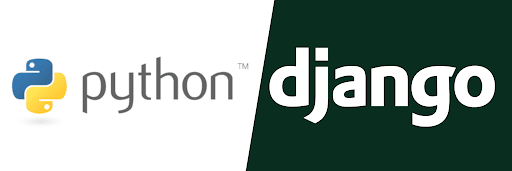

# Models

A model is the single, definitive source of information about your data. It contains the essential fields and behaviors of the data you’re storing. Generally, each model maps to a single database table.

https://docs.djangoproject.com/en/3.1/topics/db/models/

Quick example:

In [ ]:
from django.db import models

class Person(models.Model):
        first_name = models.CharField(max_length=30, null=True)
        last_name = models.CharField(max_length=30)        

## SQL 

In [ ]:
CREATE TABLE myapp_person (
"id" serial NOT NULL PRIMARY KEY,
"first_name" varchar(30) NOT NULL,
"last_name" varchar(30) NOT NULL
);

## Fields

The most important part of a model – and the only required part of a model –
    is the list of database fields it defines. Fields are specified by class attributes.
    Be careful not to choose field names that conflict with the models API like clean, save, or delete.


## Example:

In [ ]:
from django.db import models

class Musician(models.Model):
    first_name = models.CharField(max_length=50)
    last_name = models.CharField(max_length=50)
    instrument = models.CharField(max_length=100)

class Album(models.Model):
    artist = models.ForeignKey(Musician, on_delete=models.CASCADE)
    name = models.CharField(max_length=100)
    release_date = models.DateField()
    num_stars = models.IntegerField()


## Field types:

    Each field in your model should be an instance of the appropriate Field class.
    Django uses the field class types to determine a few things:

        The column type, which tells the database what kind of data to store (e.g. INTEGER, VARCHAR, TEXT).
        The default HTML widget to use when rendering a form field (e.g. <input type="text">, <select>).
        The minimal validation requirements, used in Django’s admin and in automatically-generated forms.
  Django ships with dozens of built-in field types; you can find the complete list in the model field reference.
        You can easily write your own fields if Django’s built-in ones don’t do the trick.
        
## Field options
  Each field takes a certain set of field-specific arguments.
  For example, CharField (and its subclasses) require a max_length argument
  which specifies the size of the VARCHAR database field used to store the data.

  There’s also a set of common arguments available to all field types.
  All are optional.

#### null
>If True, Django will store empty values as NULL in the database. Default is False.

#### blank
>If True, the field is allowed to be blank. Default is False.
        Note that this is different than null.
        null is purely database-related, whereas blank is validation-related.
        If a field has blank=True, form validation will allow entry of an empty value.
        If a field has blank=False, the field will be required.

#### choices
> An iterable (e.g., a list or tuple) of 2-tuples to use as choices for this field.
            If this is given, the default form widget will be a select box
            instead of the standard text field and will limit choices to the choices given.
            The first element in each tuple is the value that will be stored in the database.
            The second element will be displayed by the default form widget or in a ModelChoiceField.
            Given a model instance, the display value for a choices field can be accessed using the get_FOO_display() method.
  

In [ ]:
from django.db import models

class Person(models.Model):
    SHIRT_SIZES = (
    ('S', 'Small'),
    ('M', 'Medium'),
    ('L', 'Large'),
    )
    name = models.CharField(max_length=60)
    shirt_size = models.CharField(max_length=1, choices=SHIRT_SIZES,def)

#### default

> The default value for the field. This can be a value or a callable object.
If callable it will be called every time a new object is created.

#### help_text

> Extra “help” text to be displayed with the form widget.
It’s useful for documentation even if your field isn’t used on a form.

#### primary_key

> If True, this field is the primary key for the model.
If you don’t specify primary_key=True for any fields in your model,
Django will automatically add an IntegerField to hold the primary key,
so you don’t need to set primary_key=True on any of your fields
unless you want to override the default primary-key behavior.
The primary key field is read-only.
If you change the value of the primary key on an existing object and then save it,
a new object will be created alongside the old one.
By default, Django gives each model the following field:
    id = models.AutoField(primary_key=True)

#### unique

> If True, this field must be unique throughout the table.

#### Verbose field names
> Each field type, except for ForeignKey, ManyToManyField and OneToOneField, takes an optional first positional argument – a verbose name. If the verbose name isn’t given, Django will automatically create it using the field’s attribute name, converting underscores to spaces.



## relationships


    Clearly, the power of relational databases lies in relating tables to each other.
    Django offers ways to define the three most common types of database relationships:
    many-to-one, many-to-many and one-to-one.
    
#### Many-to-one relationships:

<img src="http://learnmongodbthehardway.com/images/originals/one-to-many.png">

>To define a many-to-one relationship, use django.db.models.ForeignKey.
    You use it just like any other Field type: by including it as a class attribute of your model.
    ForeignKey requires a positional argument: the class to which the model is related.
    For example, if a Car model has a Manufacturer –
    that is, a Manufacturer makes multiple cars but each Car only has one Manufacturer –
    use the following definitions:

In [ ]:
from django.db import models

class Manufacturer(models.Model):
    # ...
    pass

class Car(models.Model):
    manufacturer = models.ForeignKey(Manufacturer, on_delete=models.CASCADE)
    # ...

<img src="https://www.599cd.com/site/courselist/access2010/expert/x1/images/defaul1.jpg">

#### Many-to-many relationships:

<img src="http://learnmongodbthehardway.com/images/originals/many-to-many.png">
<img src= "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/CPT-Databases-ManytoMany.svg/460px-CPT-Databases-ManytoMany.svg.png">
>To define a many-to-many relationship, use ManyToManyField.
    You use it just like any other Field type: by including it as a class attribute of your model.
    ManyToManyField requires a positional argument: the class to which the model is related.
    For example, if a Pizza has multiple Topping objects –
    that is, a Topping can be on multiple pizzas and each Pizza has multiple toppings. 
    
>It’s suggested, but not required, that the name of a ManyToManyField
    (toppings in the example above) be a plural describing the set of related model objects.

>    It doesn’t matter which model has the ManyToManyField,
    but you should only put it in one of the models – not both.

>    Generally, ManyToManyField instances should go in the object that’s going to be edited on a form.
    In the above example, toppings is in Pizza (rather than Topping having a pizzas ManyToManyField )
    because it’s more natural to think about a pizza having toppings than a topping being on multiple pizzas.
    The way it’s set up above, the Pizza form would let users select the toppings.

In [ ]:
from django.db import models

class Topping(models.Model):
    # ...
    pass

class Pizza(models.Model):
    # ...
    toppings = models.ManyToManyField(Topping)

#### One-to-one relationships

<img src="http://learnmongodbthehardway.com/images/originals/one-to-one.png">
<img src="http://www.teach-ict.com/as_a2_ict_new/ocr/AS_G061/315_database_concepts/attributes_entities/miniweb/images/one2one.jpg">
>    To define a one-to-one relationship, use OneToOneField.
    You use it just like any other Field type: by including it as a class attribute of your model.
    This is most useful on the primary key of an object when that object “extends” another object in some way.
    OneToOneField requires a positional argument: the class to which the model is related.
    For example, if you were building a database of “places”,
    you would build pretty standard stuff such as address, phone number, etc. in the database.
    Then, if you wanted to build a database of restaurants on top of the places,
    instead of repeating yourself and replicating those fields in the Restaurant model,
    you could make Restaurant have a OneToOneField to Place (because a restaurant “is a” place;
    in fact, to handle this you’d typically use inheritance, which involves an implicit one-to-one relation).

In [ ]:
class Employee(models.Model):
    first_name = models.CharField(max_length=255)
    last_name = models.CharField(max_length=255)
    position = models.CharField(max_length=255)
    office = models.CharField(max_length=20)
    department = models.ForeignKey(Department, related_name='employees')
    salary = models.OneToOneField(Salary)# <---------------------------
    pair_programmer = models.OneToOneField('self')# <---------------------------

## Models across files:

It’s perfectly OK to relate a model to one from another app.
    To do this, import the related model at the top of the file where your model is defined.
    Then, just refer to the other model class wherever needed. For example:

In [ ]:
from django.db import models
from geography.models import ZipCode #<----
# از برنامه های دیگه مدل ها را میشه استفاده کرد 
# مفاهیم ارث بری در شیع گرایی
class Restaurant(models.Model):
    # ...
    zip_code = models.ForeignKey(
        ZipCode,
        on_delete=models.SET_NULL,
        blank=True,
        null=True,
    )

## run a model

### 1.start a project

In [ ]:
django-admin startproject project_name

### 2.start an app

In [ ]:
python manage.py startapp app_name

### 3.add the app

In [ ]:
INSTALLED_APPS = [
    #...
    'myapp',
    #...
    ]

### 4.write models

In [ ]:
from django.db import models
from django.utils import timezone
import datetime

class Question(models.Model):
    question_text = models.CharField(max_length=200)
    pub_date = models.DateTimeField('date published')

    def __str__(self):
        return self.question_text

class Choice(models.Model):
    question = models.ForeignKey(Question, on_delete=models.CASCADE)
    choice_text = models.CharField(max_length=200)
    votes = models.IntegerField(default=0)

    def __str__(self):
        return self.choice_text


### 5.save models on database

In [ ]:
python manage.py makemigrations app_name
python manage.py migrate

### 6.explore with Sqlite and add items

# Making queries

In [ ]:
python manage.py shell

In [ ]:
# Import the model classes we just wrote.
from polls.models import Question, Choice

# SQL SELECT Statement

In [ ]:
SELECT * FROM table_name;
SELECT CustomerName, City FROM Customers;

#### Django

In [ ]:
Question.objects.all()

In [ ]:
# Now it has an ID. Note that this might say "1L" instead of "1", depending
# on which database you're using. That's no biggie; it just means your
# database backend prefers to return integers as Python long integer
# objects.
q.id

# Access model field values via Python attributes.
q.question_text
q.pub_date

# SQL INSERT INTO Statement

In [ ]:
INSERT INTO table_name
VALUES (value1, value2, value3, ...);

INSERT INTO Customers (CustomerName, ContactName, Address, City, PostalCode, Country)
VALUES ('Cardinal', 'Tom B. Erichsen', 'Skagen 21', 'Stavanger', '4006', 'Norway');


#### Django

In [ ]:
# Create a new Question.
# Support for time zones is enabled in the default settings file, so
# Django expects a datetime with tzinfo for pub_date. Use timezone.now()
# instead of datetime.datetime.now() and it will do the right thing.
from django.utils import timezone
q = Question(question_text="What's new?", pub_date=timezone.now())

# Save the object into the database. You have to call save() explicitly.
# This performs an INSERT SQL statement behind the scenes. 
# Django doesn’t hit the database until you explicitly call save().
# The save() method has no return value.
q.save()

#### Saving ForeignKey and ManyToManyField fields

In [ ]:
from django.db import models

class Blog(models.Model):
    name = models.CharField(max_length=100)
    tagline = models.TextField()

    def __str__(self):              # __unicode__ on Python 2
        return self.name

class Author(models.Model):
    name = models.CharField(max_length=200)
    email = models.EmailField()

    def __str__(self):              # __unicode__ on Python 2
        return self.name

class Entry(models.Model):
    blog = models.ForeignKey(Blog, on_delete=models.CASCADE)
    authors = models.ManyToManyField(Author)
    headline = models.CharField(max_length=255)
    body_text = models.TextField()
    pub_date = models.DateField()
    mod_date = models.DateField()
    n_comments = models.IntegerField()
    n_pingbacks = models.IntegerField()
    rating = models.IntegerField()

    def __str__(self):              # __unicode__ on Python 2
        return self.headline

#### Updating a ForeignKey field
Updating a ForeignKey field works exactly the same way as saving a normal field – simply assign an object of the right type to the field in question. This example updates the blog attribute of an Entry instance entry, assuming appropriate instances of Entry and Blog are already saved to the database (so we can retrieve them below):

In [ ]:
from blog.models import Blog, Entry
entry = Entry.objects.get(pk=1)
cheese_blog = Blog.objects.get(name="Cheddar Talk")
entry.blog = cheese_blog
entry.save()

#### Updating a ManyToManyField
Updating a ManyToManyField works a little differently – use the add() method on the field to add a record to the relation. This example adds the Author instance joe to the entry object:

In [ ]:
from blog.models import Author
joe = Author.objects.create(name="Joe")
entry.authors.add(joe)

To add multiple records to a ManyToManyField in one go, include multiple arguments in the call to add(), like this:

In [ ]:
john = Author.objects.create(name="John")
paul = Author.objects.create(name="Paul")
george = Author.objects.create(name="George")
ringo = Author.objects.create(name="Ringo")
entry.authors.add(john, paul, george, ringo)

#### SQL WHERE Clause

In [ ]:
SELECT * FROM Customers
WHERE Country='Mexico';

#### Django

A QuerySet represents a collection of objects from your database. It can have zero, one or many filters. Filters narrow down the query results based on the given parameters. In SQL terms, a QuerySet equates to a SELECT statement, and a filter is a limiting clause such as WHERE or LIMIT.

In [ ]:
Entry.objects.filter(pub_date__year=2006)
Entry.objects.all().filter(pub_date__year=2006)

#### Chaining filters
The result of refining a QuerySet is itself a QuerySet, so it’s possible to chain refinements together. For example:

In [ ]:
Entry.objects.filter(
...     headline__startswith='What'
... ).exclude(
...     pub_date__gte=datetime.date.today()
... ).filter(
...     pub_date__gte=datetime.date(2005, 1, 30)
... )

#### Retrieving a single object with get()

filter() will always give you a QuerySet, even if only a single object matches the query - in this case, it will be a QuerySet containing a single element.

If you know there is only one object that matches your query, you can use the get() method on a Manager which returns the object directly:

In [ ]:
one_entry = Entry.objects.get(pk=1)

#### Field lookups
Field lookups are how you specify the meat of an SQL WHERE clause. They’re specified as keyword arguments to the QuerySet methods filter(), exclude() and get().

Basic lookups keyword arguments take the form field__lookuptype=value. (That’s a double-underscore). For example:

#### SQL

In [ ]:
SELECT * FROM blog_entry WHERE pub_date <= '2006-01-01';
SELECT ... WHERE headline = 'Cat bites dog';
SELECT ... WHERE headline LIKE '%Lennon%';

#### Django

In [ ]:
Entry.objects.filter(pub_date__lte='2006-01-01')
Entry.objects.get(headline__exact="Cat bites dog")
Blog.objects.get(name__iexact="beatles blog")
Entry.objects.get(headline__contains='Lennon')
Blog.objects.filter(entry__headline__contains='Lennon')

# Get all blog entries with id > 14
Blog.objects.filter(pk__gt=14)

# INSERT  Statement

In [ ]:
q = Question(question_text="What's new?", pub_date=timezone.now())
q.save()

# SQL UPDATE Statement

In [ ]:
UPDATE Customers
SET ContactName = 'Alfred Schmidt', City= 'Frankfurt'
WHERE CustomerID = 1;

#### Django

In [ ]:
q=Question.objects.all()[0]
q.question_text = "What's up?"
q.save()

In [ ]:
# Change every Entry so that it belongs to this Blog.
Question.objects.all().update(question_text=b)

# SQL DELETE Statement

In [ ]:
DELETE FROM Customers
WHERE CustomerName='Alfreds Futterkiste';

#### Django

In [ ]:
q=Question.objects.all()[0]
q.delete()

# SQL Joins

Here are the different types of the JOINs in SQL:

>(INNER) JOIN: Returns records that have matching values in both tables

>LEFT (OUTER) JOIN: Return all records from the left table, and the matched records from the right table

>RIGHT (OUTER) JOIN: Return all records from the right table, and the matched records from the left table

>FULL (OUTER) JOIN: Return all records when there is a match in either left or right table

<img src="images/join.png">

<img src="https://i.stack.imgur.com/ytO9K.png">

In [ ]:
SELECT Orders.OrderID, Customers.CustomerName
FROM Orders
INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID;

#### Lookups that span relationships
Django offers a powerful and intuitive way to “follow” relationships in lookups, taking care of the SQL JOINs for you automatically, behind the scenes. To span a relationship, just use the field name of related fields across models, separated by double underscores, until you get to the field you want.

This example retrieves all Entry objects with a Blog whose name is 'Beatles Blog':

In [ ]:
from django.db import models

class Blog(models.Model):
    name = models.CharField(max_length=100)
    tagline = models.TextField()

class Entry(models.Model):
    blog = models.ForeignKey(Blog, on_delete=models.CASCADE)
    authors = models.ManyToManyField(Author)
    headline = models.CharField(max_length=255)
    body_text = models.TextField()
    pub_date = models.DateField()
    mod_date = models.DateField()
    n_comments = models.IntegerField()
    n_pingbacks = models.IntegerField()
    rating = models.IntegerField()

In [ ]:
#This spanning can be as deep as you’d like.
Entry.objects.filter(blog__name='Beatles Blog')

#### “reverse” relationship
It works backwards, too. To refer to a “reverse” relationship, just use the lowercase name of the model.

This example retrieves all Blog objects which have at least one Entry whose headline contains 'Lennon':

In [ ]:
Blog.objects.filter(entry__headline__contains='Lennon')
Blog.objects.filter(entry__authors__name='Lennon')

#### Related objects
When you define a relationship in a model (i.e., a ForeignKey, OneToOneField, or ManyToManyField), instances of that model will have a convenient API to access the related object(s).

Using the models at the top of this page, for example, an Entry object e can get its associated Blog object by accessing the blog attribute: e.blog.

(Behind the scenes, this functionality is implemented by Python descriptors. This shouldn’t really matter to you, but we point it out here for the curious.)

Django also creates API accessors for the “other” side of the relationship – the link from the related model to the model that defines the relationship. For example, a Blog object b has access to a list of all related Entry objects via the entry_set attribute: b.entry_set.all().

#### One-to-many relationships Forward


In [ ]:
e = Entry.objects.get(id=2)
e.blog = some_blog
e.save()

#### Following relationships “backward”

If a model has a ForeignKey, instances of the foreign-key model will have access to a Manager that returns all instances of the first model. By default, this Manager is named FOO_set, where FOO is the source model name, lowercased. This Manager returns QuerySets, which can be filtered and manipulated as described in the “Retrieving objects” section above.

In [ ]:
b = Blog.objects.get(id=1)
b.entry_set.all() # Returns all Entry objects related to Blog.

# b.entry_set is a Manager that returns QuerySets.
b.entry_set.filter(headline__contains='Lennon')
b.entry_set.count()

#### Many-to-many relationships

Both ends of a many-to-many relationship get automatic API access to the other end. The API works just as a “backward” one-to-many relationship, above.

The only difference is in the attribute naming: The model that defines the ManyToManyField uses the attribute name of that field itself, whereas the “reverse” model uses the lowercased model name of the original model, plus '_set' (just like reverse one-to-many relationships).

An example makes this easier to understand:

In [ ]:
e = Entry.objects.get(id=3)
e.authors.all() # Returns all Author objects for this Entry.
e.authors.count()
e.authors.filter(name__contains='John')

a = Author.objects.get(id=5)
a.entry_set.all() # Returns all Entry objects for this Author.

#### create

In [ ]:
# Give the Question a couple of Choices. The create call constructs a new
# Choice object, does the INSERT statement, adds the choice to the set
# of available choices and returns the new Choice object. Django creates
# a set to hold the "other side" of a ForeignKey relation
# (e.g. a question's choice) which can be accessed via the API.
q = Question.objects.get(pk=1)

# Display any choices from the related object set -- none so far.
q.choice_set.all()
#<QuerySet []>

# Create three choices.
q.choice_set.create(choice_text='Not much', votes=0)
#<Choice: Not much>
q.choice_set.create(choice_text='The sky', votes=0)
#<Choice: The sky>
c = q.choice_set.create(choice_text='Just hacking again', votes=0)

# Choice objects have API access to their related Question objects.
c.question
#<Question: What's up?>

# And vice versa: Question objects get access to Choice objects.
q.choice_set.all()
#<QuerySet [<Choice: Not much>, <Choice: The sky>, <Choice: Just hacking again>]>
q.choice_set.count()
#3

# Performing raw SQL queries

## Warning

You should be very careful whenever you write raw SQL. Every time you use it, you should properly escape any parameters that the user can control by using params in order to protect against SQL injection attacks. Please read more about SQL injection protection.

In [ ]:
class Person(models.Model):
    first_name = models.CharField(...)
    last_name = models.CharField(...)
    birth_date = models.DateField(...)

In [ ]:
for p in Person.objects.raw('SELECT * FROM myapp_person'):
...     print(p)
John Smith
Jane Jones

In [ ]:
>>> Person.objects.raw('''SELECT first AS first_name,
...                              last AS last_name,
...                              bd AS birth_date,
...                              pk AS id,
...                       FROM some_other_table''')

# Exercise

### 1. what is the difference between NULL and Blank ? 
### 2.<img src="images/e1.bmp">
### 3.create customer model

In [ ]:
CREATE TABLE CUSTOMERS(
   ID   INT              NOT NULL,
   NAME VARCHAR (20)     NOT NULL,
   AGE  INT              NOT NULL,
   ADDRESS  CHAR (25) ,
   SALARY   DECIMAL (18, 2),       
   PRIMARY KEY (ID)
);

In [ ]:
+---------+---------------+------+-----+---------+-------+
| Field   | Type          | Null | Key | Default | Extra |
+---------+---------------+------+-----+---------+-------+
| ID      | int(11)       | NO   | PRI |         |       |
| NAME    | varchar(20)   | NO   |     |         |       |
| AGE     | int(11)       | NO   |     |         |       |
| ADDRESS | char(25)      | YES  |     | NULL    |       |
| SALARY  | decimal(18,2) | YES  |     | NULL    |       |
+---------+---------------+------+-----+---------+-------+


### 4. create model
<img src="https://support.airtable.com/hc/en-us/article_attachments/206766538/Screen_Shot_2016-04-26_at_3.21.49_PM.png">

### 5.install SQLiteManager

### 6.


<img src="https://mdn.mozillademos.org/files/14021/local_library_model_uml_v0_1.png">

In [ ]:
from django.db import models
import uuid

class Author(models.Model):
    """
    Model representing an author.
    """
    first_name = models.CharField(max_length=100)
    last_name = models.CharField(max_length=100)
    date_of_birth = models.DateField(null=True, blank=True)
    date_of_death = models.DateField('Died', null=True, blank=True)

class Genre(models.Model):
    name= models.CharField(max_length=200, help_text="Enter a book genre (e.g. Science Fiction, French Poetry etc.)")


class Book(models.Model):
    title= models.CharField(max_length=200)
    author=models.ForeignKey(Author, null=True, on_delete=models.SET_NULL)
    summary = models.TextField(max_length=1000, help_text="Enter a brief description of the book")
    isbn = models.CharField('ISBN',max_length=13, help_text='13 Character <a href="https://www.isbn-international.org/content/what-isbn">ISBN number</a>')
    genre= models.ManyToManyField(Genre, help_text="Select a genre for this book")

    
class BookInstance(models.Model):
    """
    Model representing a specific copy of a book (i.e. that can be borrowed from the library).
    """
    id = models.UUIDField(primary_key=True, default=uuid.uuid4, help_text="Unique ID for this particular book across whole library")
    book = models.ForeignKey('Book', on_delete=models.SET_NULL, null=True)
    imprint = models.CharField(max_length=200)
    due_back = models.DateField(null=True, blank=True)

    LOAN_STATUS = (
        ('m', 'Maintenance'),
        ('o', 'On loan'),
        ('a', 'Available'),
        ('r', 'Reserved'),
    )

    status = models.CharField(max_length=1, choices=LOAN_STATUS, blank=True, default='m', help_text='Book availability')

